# Network Analysis for ABCD data

http://dx.plos.org/10.1371/journal.pbio.1002328  
https://www.sciencedirect.com/science/article/pii/S105381191730109X?via%3Dihub

In [ ]:
# ! pip install python-louvain

In [4]:
import glob
import os
import networkx as nx
import numpy as np
import pandas as pd
import community
from sklearn.metrics.cluster import normalized_mutual_info_score
import bz2
import pickle
import pdb
import statistics
import matplotlib
matplotlib.use("Qt5Agg")
import matplotlib.pyplot as plt

from visbrain.objects import ConnectObj, SceneObj, SourceObj, BrainObj
from visbrain.io import download_file

/Users/gracer/.local/lib/python3.6/site-packages/vispy/visuals/isocurve.py:22: UserWarning: VisPy is not yet compatible with matplotlib 2.2+
  warnings.warn("VisPy is not yet compatible with matplotlib 2.2+")


## Data of interest (from R notebook)

### Read in labels

In [26]:
labels = pd.read_csv('/Users/gracer/Google Drive/ABCD/important_txt/locations.csv', sep=",")

In [27]:
interest =  pd.read_csv('/Users/gracer/Google Drive/ABCD/important_txt/data4analysis.txt', sep="\t", header=None, 
                 index_col=False)
interest.head()
subs=interest[0]
subs=list(subs)
subs

['sub-NDARINVULZMADF1',
 'sub-NDARINVD9L81NY5',
 'sub-NDARINV019DXLU4',
 'sub-NDARINVMFVA1BZF',
 'sub-NDARINVGCFRP15A',
 'sub-NDARINV08FUB58A',
 'sub-NDARINV8JTY86NW',
 'sub-NDARINV8PHEF3UH',
 'sub-NDARINV2484CB0H',
 'sub-NDARINV723AA4WA',
 'sub-NDARINV6790DE8Z',
 'sub-NDARINV5NR371CT',
 'sub-NDARINV464X4LJP',
 'sub-NDARINVFNH524U3',
 'sub-NDARINV137Y0WR8',
 'sub-NDARINVKW1ALL48',
 'sub-NDARINVH6K9F426',
 'sub-NDARINVJPM26GH0',
 'sub-NDARINV45HV5L52',
 'sub-NDARINVKTZGA2UH',
 'sub-NDARINV4PR3H6ZL',
 'sub-NDARINV5VTE9R5K',
 'sub-NDARINVK8CYP94F',
 'sub-NDARINV72MV78KG',
 'sub-NDARINV3XL11J4W',
 'sub-NDARINVUXT4TZJF',
 'sub-NDARINV10ZLTFJZ',
 'sub-NDARINV1T4GDEXG',
 'sub-NDARINV1AA2VG9C',
 'sub-NDARINVA3G711KJ',
 'sub-NDARINV2U88LX3T',
 'sub-NDARINV4EKBZJTW',
 'sub-NDARINV2G3T7XUL',
 'sub-NDARINVKNRU5BYD',
 'sub-NDARINV459DR5EV',
 'sub-NDARINV29299DLJ',
 'sub-NDARINVK09GADZN',
 'sub-NDARINV3H19ZCF8',
 'sub-NDARINV2MKXWKGF',
 'sub-NDARINVJNDY0DWK',
 'sub-NDARINVJTWZXR3M',
 'sub-NDARINVX3P

## Get data

In [28]:
data = glob.glob('/Users/gracer/Google Drive/ABCD/ABCDworking/sub-*/keep/sub-NDAR*_ses-baselineYear1Arm1_task-rest_run-0*_bold_brain_norm_zr_matrix.csv')

In [29]:
data[0:10]

['/Users/gracer/Google Drive/ABCD/ABCDworking/sub-NDARINVKCU1HRMA/keep/sub-NDARINVKCU1HRMA_ses-baselineYear1Arm1_task-rest_run-01_bold_brain_norm_zr_matrix.csv',
 '/Users/gracer/Google Drive/ABCD/ABCDworking/sub-NDARINVKCU1HRMA/keep/sub-NDARINVKCU1HRMA_ses-baselineYear1Arm1_task-rest_run-02_bold_brain_norm_zr_matrix.csv',
 '/Users/gracer/Google Drive/ABCD/ABCDworking/sub-NDARINV20CNYBBC/keep/sub-NDARINV20CNYBBC_ses-baselineYear1Arm1_task-rest_run-02_bold_brain_norm_zr_matrix.csv',
 '/Users/gracer/Google Drive/ABCD/ABCDworking/sub-NDARINV20CNYBBC/keep/sub-NDARINV20CNYBBC_ses-baselineYear1Arm1_task-rest_run-03_bold_brain_norm_zr_matrix.csv',
 '/Users/gracer/Google Drive/ABCD/ABCDworking/sub-NDARINV20CNYBBC/keep/sub-NDARINV20CNYBBC_ses-baselineYear1Arm1_task-rest_run-01_bold_brain_norm_zr_matrix.csv',
 '/Users/gracer/Google Drive/ABCD/ABCDworking/sub-NDARINVJ67B8F0J/keep/sub-NDARINVJ67B8F0J_ses-baselineYear1Arm1_task-rest_run-04_bold_brain_norm_zr_matrix.csv',
 '/Users/gracer/Google Drive

#### Make a dictonary to store the path and subject ID

In [30]:
my_dict={}
for item in data:
    name=item.split('/')[6]
    my_dict.setdefault(name, []).append(item)

### Make a dictonary of all the file paths common to the subject list 

In [31]:
path_dict = {k: my_dict[k] for k in subs if k in my_dict}

### Make a dictonary to read in the files

In [35]:
data_dict={}
num=[]
for key, value in path_dict.items():
    print(len(value))
    num.append(len(value))
    for i in value:
        data_dict.setdefault(key, []).append(pd.read_csv(i, header=None,index_col=False))
#         data_dict[key]= pd.read_csv(i, header=None,index_col=False)

4
2
4
4
4
4
3
4
4
4
4
3
3
4
3
4
4
4
4
4
2
4
4
4
4
3
4
4
4
4
4
4
4
4
4
4
4
1
4
4
4
3
4
4
1
3
4
1
2
3
4
4
3
4
4
4
4
4
4
4
4
4
5
4
4
2
4
3
4
4
4
4
4
4
4
2
4
4
4
4
4
4
4
4
4
4
4
4
4
3
4
4
3
4
4
4
4
4
4
4
2
4
4
3
4
4
4
4
4
4
3
4
4
4
3
3
4
4
4
6


In [37]:
np.mean(num)

3.716666666666667

# check subjects

In [34]:
len(list(data_dict.keys()))

120

### Function to create a graph with positive or negative values and minimum correlation value

In [ ]:
def create_corr_network_5(G, corr_direction, min_correlation):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in list(G.edges(data=True)):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0        
        if corr_direction == "positive":
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
    return(H)


### Function to make a graph object BY SUBJECT
This will return: 
* The edges (noramlized R correlation matrix, in pandas dataframe)
* The correlations (absolute value of the edges in a numpy dataframe)
* The mean_FC (the mean functional connectivity per subject/run)
* The graphs (this will contain the raw graph object G as well as the the partion values from the modularity calculation)

In [ ]:
def make_graphs(list_o_data, direction, min_cor):
    edge_dict={}
    cor_dict={}
    FC_dict={}
    graph_dict={}
    for key, val_list in list_o_data.items():
        for i in val_list:
            i=i.set_index(labels.ID)
            i.rename(columns=labels.ID, inplace=True)
            ########################################
            edge_dict.setdefault(key, []).append(i)
            ########################################
            cor_matrix = np.asmatrix(i)
            x=abs(cor_matrix)
            mu=x.mean()
            ########################################
            cor_dict.setdefault(key, []).append(x)
            ########################################
            FC_dict.setdefault(key, []).append(mu)
            ########################################
            G = nx.from_numpy_matrix(cor_matrix)
            for i, nlrow in labels.iterrows():
                G.node[i].update(nlrow[0:].to_dict())
            ########################################
            graph_dict.setdefault(key, []).append(G)
            ########################################
            partition = community.best_partition(create_corr_network_5(G, direction,min_cor))
            ########################################
            graph_dict.setdefault(key, []).append(partition)
            ########################################
    return({'edges':edge_dict, 'correlations':cor_dict, 'mean_FC':FC_dict, 'graphs':graph_dict})

In [ ]:
# GRAPHS=make_graphs(data_dict, "positive", 0)

In [ ]:
GRAPHS.keys()

In [ ]:
interest.head()

In [ ]:
interest_dict=interest.set_index(interest[0]).to_dict()
def removekey(d, key):
    r = dict(d)
    del r[key]
    return r
cov_dict=removekey(interest_dict, 0)
cov_dict['sex'] = cov_dict.pop(1)
cov_dict['PCS'] = cov_dict.pop(2)
cov_dict['OVOB'] = cov_dict.pop(3)
print(cov_dict.keys())

In [ ]:
cov_dict['sex']['sub-NDARINVULZMADF1']

In [ ]:
for key in cov_dict.keys():
    for subkey, value in cov_dict[key].items():
        if subkey in GRAPHS['graphs']:
            GRAPHS['graphs'][subkey].append(value)
            print(GRAPHS['graphs'][subkey])

### Differences in mean FC

In [ ]:
list(GRAPHS['mean_FC'].keys())

In [ ]:
GRAPHS['mean_FC']['sub-NDARINVULZMADF1']

In [ ]:
tmp=[]
o=[]

for key,value in GRAPHS['mean_FC'].items():
    o=value
    z=statistics.stdev([i for i in o if isinstance(i, int) or isinstance(i, float)])
    x=sum([i for i in o if isinstance(i, int) or isinstance(i, float)])
    y=len([i for i in o if isinstance(i, int) or isinstance(i, float)])
    mu=x/y
    o.append(mu)
    o.append(z)

### How to delete items in list that you accidentally made

In [ ]:
# for key,value in article['mean_FC'].items():
#     del value[-7:]

### analysis picked back up, needed to unpickle

In [5]:
import pickle
with open('/Users/gracer/Google Drive/ABCD/tmp/graphAna4', 'rb') as pickle_file:
    try:
        while True:
            article = pickle.load(pickle_file)
            print (article)
    except EOFError:
        pass

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
GRAPHS = article

In [7]:
GRAPHS.keys()

dict_keys(['edges', 'correlations', 'mean_FC', 'graphs', 'BIGdf'])

In [8]:
BIGdf=GRAPHS['BIGdf']

### Getting the standard deviation 

In [ ]:
# for key,value in GRAPHS['mean_FC'].items():
#     o=value[:-4]
#     try:
#         x=statistics.stdev([i for i in o if isinstance(i, int) or isinstance(i, float)])
#         print(x)
#         value.append(x)
#     except:
#         x='NaN'
#         print(x)
#         value.append(x)

In [ ]:
GRAPHS['mean_FC']['sub-NDARINVULZMADF1']

### Making dataframe to use 

In [ ]:
PID = list(GRAPHS['mean_FC'].keys())
len(PID)

In [ ]:
# list(GRAPHS['mean_FC'].values())

In [19]:
sex=[]
PCS=[]
OVOB=[]
mean_FC=[]
sd_FC=[]
for item in list(GRAPHS['mean_FC'].values()):
    sex.append(item[-5])
    PCS.append(item[-4])
    OVOB.append(item[-3])
    mean_FC.append(item[-2])
    sd_FC.append(item[-1])

In [25]:
len(OVOB)

120

### Creating a dataframe 

In [21]:
FCmat=np.column_stack([PID, sex, PCS, OVOB, mean_FC, sd_FC])
FCdf=pd.DataFrame(FCmat, columns = ['subjects','sex','PCS','OVOB','mean','SD'])
FCdf=FCdf.fillna(0)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [ ]:
FCdf.describe()

### Testing differences in mean FC
See the matching R notebook
Summary:
* No difference in the FC between PCS (no need to control for it in models)
* Trending difference in the FC between OVOB (may need to control for it in the model)

### Differences in modularity by subject (probs won't use, don't know what it means)

In [ ]:
GRAPHS['graphs']['sub-NDARINVULZMADF1'][10]

In [11]:
PID = []
Parts = []
for key, value in GRAPHS['graphs'].items():
    for item in value:
        if isinstance(item,dict):
            print(key)
            print(item)
            PID.append(key)
            Parts.append(value[1])

sub-NDARINVULZMADF1
{0: 0, 1: 1, 2: 2, 3: 3, 4: 3, 5: 2, 6: 2, 7: 2, 8: 3, 9: 2, 10: 2, 11: 2, 12: 3, 13: 3, 14: 2, 15: 3, 16: 3, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 3, 24: 2, 25: 2, 26: 3, 27: 2, 28: 1, 29: 3, 30: 3, 31: 2, 32: 3, 33: 2, 34: 2, 35: 3, 36: 3, 37: 3, 38: 2, 39: 3, 40: 2, 41: 1, 42: 3, 43: 4, 44: 2, 45: 2, 46: 2, 47: 3, 48: 2, 49: 2, 50: 3, 51: 3, 52: 1, 53: 2, 54: 1, 55: 2, 56: 1, 57: 2, 58: 2, 59: 2, 60: 2, 61: 1, 62: 1, 63: 2, 64: 2, 65: 1, 66: 2, 67: 1, 68: 1, 69: 3, 70: 2, 71: 2, 72: 1, 73: 2, 74: 1, 75: 1, 76: 1, 77: 1, 78: 2, 79: 1, 80: 1, 81: 1, 82: 3, 83: 2, 84: 5, 85: 1, 86: 1, 87: 2, 88: 2, 89: 5, 90: 1, 91: 2, 92: 1, 93: 3, 94: 2, 95: 2, 96: 2, 97: 2, 98: 3, 99: 2, 100: 1, 101: 2, 102: 2, 103: 1, 104: 1, 105: 2, 106: 2, 107: 2, 108: 2, 109: 3, 110: 1, 111: 2, 112: 1, 113: 1, 114: 2, 115: 3, 116: 1, 117: 1, 118: 6, 119: 2, 120: 7, 121: 1, 122: 1, 123: 3, 124: 7, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135: 1, 1

In [12]:
len(Parts)

446

In [13]:
ROIs=[]
Modules=[]
for item in Parts:
#     print(item.keys())
    ROIs.append(list(item.keys()))
    Modules.append(list(item.values()))

In [14]:
PIDar = np.array(PID)
ROIar=np.array(ROIs)
ModuleAr=np.array(Modules)
print(ModuleAr.shape)
print(PIDar.shape)

(446, 264)
(446,)


In [15]:
PARTdf = pd.DataFrame(ModuleAr)
PARTdf['subjects'] = PIDar
# PARTdf

In [16]:
# PARTdf.to_csv("/Users/gracer/Google Drive/ABCD/tmp/PARTS.csv", sep=',', index=False)

In [17]:
BIGdf = pd.merge(PARTdf, FCdf, on="subjects")
BIGdf.head()

NameError: name 'FCdf' is not defined

In [9]:
categories = BIGdf[['subjects', 'sex','PCS','OVOB']]
categories.head()

,subjects,sex,PCS,OVOB
0,sub-NDARINVULZMADF1,F,latepubertal,Obese
1,sub-NDARINVULZMADF1,F,latepubertal,Obese
2,sub-NDARINVULZMADF1,F,latepubertal,Obese
3,sub-NDARINVULZMADF1,F,latepubertal,Obese
4,sub-NDARINVD9L81NY5,F,latepubertal,Obese


In [ ]:
x=BIGdf[1].value_counts().idxmax()

In [10]:
maxes={}
for sub in PID:
    subset=BIGdf.loc[(BIGdf['subjects'] == sub)]
    for col in subset:
        macks = subset[col].value_counts().idxmax()
        maxes.setdefault(sub, []).append(macks)
    #     print(PARTdf[col].value_counts().idxmax())

NameError: name 'PID' is not defined

In [ ]:
subjects=[]
max_vals=[]
for key, value in maxes.items():
#     print(item.keys())
    subjects.append(key)
    max_vals.append(list(value))

In [ ]:
Subar = np.array(subjects)
Valar=np.array(max_vals)
print(Subar.shape)
print(Valar.shape)

In [ ]:
MAXdf = pd.DataFrame(Valar)
MAXdf['subjects'] = Subar

In [ ]:
# MAXdf.to_csv("/Users/gracer/Google Drive/ABCD/tmp/MAX.csv", sep=',', index=False)

In [ ]:
norm_max=[]
subset=MAXdf.loc[(MAXdf[267] == 'Normalweight')]
for col in subset:
    mechs = subset[col].value_counts().idxmax()
    norm_max.append(mechs)
#     print(PARTdf[col].value_counts().idxmax())

In [ ]:
ov_max=[]
subset=MAXdf.loc[(MAXdf[267] == 'Overweight')]
for col in subset:
    mechs = subset[col].value_counts().idxmax()
    ov_max.append(mechs)
#     print(PARTdf[col].value_counts().idxmax())

In [ ]:
ob_max=[]
subset=MAXdf.loc[(MAXdf[267] == 'Obese')]
for col in subset:
    mechs = subset[col].value_counts().idxmax()
    ob_max.append(mechs)

In [ ]:
normAR = np.array(norm_max)
ovAR = np.array(ov_max)
obAR = np.array(ob_max)

print(normAR.shape)
print(ovAR.shape)
print(obAR.shape)

In [ ]:
len(ob_max)

In [ ]:
g=community.induced_graph(partition,H)
create_corr_network_1(G=g)

### Normalized information score  
sklearn.metrics.normalized_mutual_info_score(labels_true [group 1], labels_pred [group 2], average_method=’warn’)

In [ ]:
diff_no_ov=normalized_mutual_info_score(norm_max, ov_max)

In [ ]:
diff_no_ob=normalized_mutual_info_score(norm_max, ob_max)

In [ ]:
diff_ov_ob=normalized_mutual_info_score(ov_max, ob_max)

In [ ]:
diff_no_ob

In [ ]:
diff_no_ov

In [ ]:
diff_ov_ob

##  Create a Mega graph by OVOB and PCS

In [53]:
def make_total_graphs(dict_o_data):
    mylist=[]
    for key, val_list in dict_o_data.items():
#         print(key)
        for i in val_list:
            cor_matrix = np.asarray(i)
            mylist.append(cor_matrix)
    x=np.stack(mylist, axis=2)
    mu=np.mean(x, axis=(2))
    return(mu)

In [54]:
GRAPHS.keys()

dict_keys(['edges', 'correlations', 'mean_FC', 'graphs', 'BIGdf'])

In [55]:
list(GRAPHS['correlations'].values())[1]

[matrix([[0.      , 0.297177, 0.366261, ..., 0.712325, 0.027972, 0.032292],
         [0.297177, 0.      , 1.067256, ..., 0.267867, 0.482737, 0.50939 ],
         [0.366261, 1.067256, 0.      , ..., 0.583668, 0.510977, 0.520726],
         ...,
         [0.712325, 0.267867, 0.583668, ..., 0.      , 0.253103, 0.211843],
         [0.027972, 0.482737, 0.510977, ..., 0.253103, 0.      , 1.947065],
         [0.032292, 0.50939 , 0.520726, ..., 0.211843, 1.947065, 0.      ]]),
 matrix([[ 0.      ,  0.618682,  0.288411, ...,  0.212559,  0.336378,
           0.047735],
         [ 0.618682,  0.      ,  0.972095, ...,  0.283186,  0.510952,
           0.318188],
         [ 0.288411,  0.972095, 18.714974, ...,  0.419613,  0.701422,
           0.603747],
         ...,
         [ 0.212559,  0.283186,  0.419613, ...,  0.      ,  0.383667,
           0.340115],
         [ 0.336378,  0.510952,  0.701422, ...,  0.383667,  0.      ,
           1.268736],
         [ 0.047735,  0.318188,  0.603747, ...,  0.340

In [56]:
no_subset=categories.loc[(categories['OVOB'] == 'Normalweight')]
no_dict = {k: GRAPHS['correlations'][k] for k in no_subset['subjects'] if k in GRAPHS['correlations']}

ov_subset=categories.loc[(categories['OVOB'] == 'Overweight')]
ov_dict = {k: GRAPHS['correlations'][k] for k in ov_subset['subjects'] if k in GRAPHS['correlations']}

ob_subset=categories.loc[(categories['OVOB'] == 'Obese')]
ob_dict = {k: GRAPHS['correlations'][k] for k in ob_subset['subjects'] if k in GRAPHS['correlations']}


In [57]:
for x in np.unique(categories['PCS']):
    subset=categories.loc[(categories['PCS'] == x)]
    early_dict = {k: GRAPHS['correlations'][k] for k in early_subset['subjects'] if k in GRAPHS['correlations']}

In [58]:
early_subset=categories.loc[(categories['PCS'] == 'earlypubertal')]
early_dict = {k: GRAPHS['correlations'][k] for k in early_subset['subjects'] if k in GRAPHS['correlations']}

late_subset=categories.loc[(categories['PCS'] == 'latepubertal')]
late_dict = {k: GRAPHS['correlations'][k] for k in late_subset['subjects'] if k in GRAPHS['correlations']}

mid_subset=categories.loc[(categories['PCS'] == 'midpubertal')]
mid_dict = {k: GRAPHS['correlations'][k] for k in mid_subset['subjects'] if k in GRAPHS['correlations']}


In [59]:
mean_no=make_total_graphs(no_dict)
mean_ov=make_total_graphs(ov_dict)
mean_ob=make_total_graphs(ob_dict)

In [60]:
mean_early=make_total_graphs(early_dict)
mean_late=make_total_graphs(late_dict)
mean_mid=make_total_graphs(mid_dict)

#### Creates graph using the data of the correlation matrix

In [61]:
noG = nx.from_numpy_matrix(mean_no)
ovG = nx.from_numpy_matrix(mean_ov)
obG = nx.from_numpy_matrix(mean_ob)
OVOBgraphs = [noG, ovG, obG]

In [62]:
earlyG = nx.from_numpy_matrix(mean_early)
midG = nx.from_numpy_matrix(mean_mid)
lateG = nx.from_numpy_matrix(mean_late)
PCSgraphs = [earlyG, midG, lateG]

In [63]:
for graph in OVOBgraphs:
    for i, nlrow in labels.iterrows():
        graph.node[i].update(nlrow[0:].to_dict())

In [64]:
for graph in PCSgraphs:
    for i, nlrow in labels.iterrows():
        graph.node[i].update(nlrow[0:].to_dict())

In [65]:
edges,weights = zip(*nx.get_edge_attributes(ovG,'weight').items())

In [66]:
early_edges, early_weights = zip(*nx.get_edge_attributes(earlyG,'weight').items())
mid_edges,mid_weights = zip(*nx.get_edge_attributes(midG,'weight').items())
late_edges,late_weights = zip(*nx.get_edge_attributes(lateG,'weight').items())

In [67]:
for graph in OVOBgraphs:
    d = nx.degree(graph)
    list(d)[0]
    nodelist, node_sizes = zip(*list(d))

In [68]:
for graph in PCSgraphs:
    d = nx.degree(graph)
    list(d)[0]
    nodelist, node_sizes = zip(*list(d))

In [69]:
def create_corr_network(G, corr_direction, min_correlation):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in list(G.edges(data=True)):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0        
        if corr_direction == "positive":
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    ### increases the value of weights, so that they are more visible in the graph
    weights = tuple([(1+abs(x))**1 for x in weights])
    
    #####calculates the degree of each node
    d = nx.degree(H)
    #####creates list of nodes and a list their degrees that will be used later for their sizes
    nodelist, node_sizes = zip(*list(d))
    return(H)

In [70]:
def create_corr_network_1(G):
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    #positions
    positions=nx.circular_layout(G)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(G,positions,node_color='#DA70D6',
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(G, positions, font_size=8, 
                            font_family='sans-serif')
        
    #draws the edges
    nx.draw_networkx_edges(G, positions, edge_list=edges,style='solid')
    
    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part1.png", format="PNG")
    plt.show() 

#create_corr_network_1(G)

In [71]:
noH=create_corr_network(noG, "positive",0)
ovH=create_corr_network(ovG, "positive", 0)
obH=create_corr_network(obG, "positive", 0)
saveme={}
saveme['noH']=noH
saveme['ovH']=ovH
saveme['obH']=obH

In [72]:
earlyH=create_corr_network(earlyG, "positive",0)
midH=create_corr_network(midG, "positive", 0)
lateH=create_corr_network(lateG, "positive", 0)
saveme={}
saveme['earlyH']=earlyH
saveme['midH']=midH
saveme['lateH']=lateH

### Getting partition values with the large graph

In [73]:
noPART = community.best_partition(noH)
ovPART = community.best_partition(ovH)
obPART = community.best_partition(obH)

# noPART.values()

In [74]:
earlyPART = community.best_partition(earlyH)
midPART = community.best_partition(midH)
latePART = community.best_partition(lateH)

# noPART.values()

### Checking the normalized mutual disribution information

In [75]:
diff_no_ov=normalized_mutual_info_score(list(noPART.values()), list(ovPART.values()))
print(diff_no_ov)

0.6388711358836793


In [76]:
diff_no_ob=normalized_mutual_info_score(list(noPART.values()), list(obPART.values()))
print(diff_no_ob)

0.7093363028784728


In [77]:
diff_early_mid=normalized_mutual_info_score(list(earlyPART.values()), list(midPART.values()))
print(diff_early_mid)

0.7265409540692255


In [78]:
diff_early_late=normalized_mutual_info_score(list(earlyPART.values()), list(latePART.values()))
print(diff_early_late)

0.7384483315112015


### Summary so far
Larger difference between the normal weight and obese compared to the normal weight and the overweight

In [79]:
color_dic = {0:'blue',1:'red',2:'green',3:'purple',4:'yellow',5:'pink',6:'black',7:'orange', 8:'cyan'}

In [80]:
PARTS=[noPART, ovPART ,obPART]
for item in PARTS:
    for key, value in item.items():
        item[key]=(color_dic[value])
#     print(item)

In [81]:
for key, value in noPART.items():
#     print("this is the key %s"%key)
#     print(value)
#     print(noH.node(data=True)[key])
    noH.node(data=True)[key].update({'color':value})


6.0


AttributeError: module 'matplotlib' has no attribute 'show'

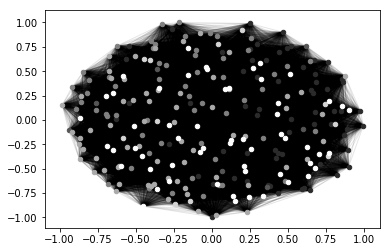

In [82]:
#drawing
size = float(len(set(noPART.values())))
print(size)
pos = nx.spring_layout(noH)
count = 0.
for com in set(noPART.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in noPART.keys()
                                if noPART[nodes] == com]
    nx.draw_networkx_nodes(noH, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(noH, pos, alpha=0.1)
plt.show()

In [84]:
for key, value in ovPART.items():
    print("this is the key %s"%key)
    print(value)
    print(ovH.node(data=True)[key])
    ovH.node(data=True)[key].update({'color':value})

this is the key 0
blue
{'X': -7, 'Y': -52, 'Z': 61, 'ID': 'Precuneus'}
this is the key 1
blue
{'X': -14, 'Y': -18, 'Z': 40, 'ID': 'Cingulate Gyrus'}
this is the key 2
blue
{'X': 0, 'Y': -15, 'Z': 47, 'ID': 'Paracentral Lobule'}
this is the key 3
blue
{'X': 10, 'Y': -2, 'Z': 45, 'ID': 'Cingulate Gyrus'}
this is the key 4
blue
{'X': -7, 'Y': -21, 'Z': 65, 'ID': 'Medial Frontal Gyrus'}
this is the key 5
blue
{'X': -7, 'Y': -33, 'Z': 72, 'ID': 'Postcentral Gyrus'}
this is the key 6
blue
{'X': 13, 'Y': -33, 'Z': 75, 'ID': 'Postcentral Gyrus'}
this is the key 7
blue
{'X': -54, 'Y': -23, 'Z': 43, 'ID': 'Postcentral Gyrus'}
this is the key 8
blue
{'X': 29, 'Y': -17, 'Z': 71, 'ID': 'Precentral Gyrus'}
this is the key 9
blue
{'X': 10, 'Y': -46, 'Z': 73, 'ID': 'Postcentral Gyrus'}
this is the key 10
blue
{'X': -23, 'Y': -30, 'Z': 72, 'ID': 'Postcentral Gyrus'}
this is the key 11
blue
{'X': -40, 'Y': -19, 'Z': 54, 'ID': 'Postcentral Gyrus'}
this is the key 12
blue
{'X': 29, 'Y': -39, 'Z': 59, 'ID'

In [85]:
for key, value in obPART.items():
    print("this is the key %s"%key)
    print(value)
    print(obH.node(data=True)[key])
    obH.node(data=True)[key].update({'color':value})

this is the key 0
blue
{'X': -7, 'Y': -52, 'Z': 61, 'ID': 'Precuneus'}
this is the key 1
blue
{'X': -14, 'Y': -18, 'Z': 40, 'ID': 'Cingulate Gyrus'}
this is the key 2
blue
{'X': 0, 'Y': -15, 'Z': 47, 'ID': 'Paracentral Lobule'}
this is the key 3
blue
{'X': 10, 'Y': -2, 'Z': 45, 'ID': 'Cingulate Gyrus'}
this is the key 4
blue
{'X': -7, 'Y': -21, 'Z': 65, 'ID': 'Medial Frontal Gyrus'}
this is the key 5
blue
{'X': -7, 'Y': -33, 'Z': 72, 'ID': 'Postcentral Gyrus'}
this is the key 6
blue
{'X': 13, 'Y': -33, 'Z': 75, 'ID': 'Postcentral Gyrus'}
this is the key 7
blue
{'X': -54, 'Y': -23, 'Z': 43, 'ID': 'Postcentral Gyrus'}
this is the key 8
blue
{'X': 29, 'Y': -17, 'Z': 71, 'ID': 'Precentral Gyrus'}
this is the key 9
blue
{'X': 10, 'Y': -46, 'Z': 73, 'ID': 'Postcentral Gyrus'}
this is the key 10
blue
{'X': -23, 'Y': -30, 'Z': 72, 'ID': 'Postcentral Gyrus'}
this is the key 11
blue
{'X': -40, 'Y': -19, 'Z': 54, 'ID': 'Postcentral Gyrus'}
this is the key 12
blue
{'X': 29, 'Y': -39, 'Z': 59, 'ID'

In [86]:
# list(H.edges(data=True))[0]
# H.edges(data=True)
no_edge_weights = [e[2]['weight'] for e in noH.edges(data=True)]
ov_edge_weights = [e[2]['weight'] for e in ovH.edges(data=True)]
ob_edge_weights = [e[2]['weight'] for e in obH.edges(data=True)]


In [87]:
# Define node positions data structure (dict) for plotting
no_node_colors = {node[0]: (node[1]['color']) for node in noH.nodes(data=True)}
ov_node_colors = {node[0]: (node[1]['color']) for node in ovH.nodes(data=True)}
ob_node_colors = {node[0]: (node[1]['color']) for node in obH.nodes(data=True)}

# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries).
#dict(list(node_colors.items())[0:5])
#print(G.node(data=True))
no_list_colors=list(no_node_colors.values())
ov_list_colors=list(ov_node_colors.values())
ob_list_colors=list(ob_node_colors.values())

In [88]:
no_node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in noH.nodes(data=True)}
ov_node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in ovH.nodes(data=True)}
ob_node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in obH.nodes(data=True)}

In [89]:
# Define node positions data structure (dict) for plotting
# node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in H.nodes(data=True)}
# node_colors = {node[0]: (node[1]['color']) for node in H.nodes(data=True)}

# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries).
#dict(list(node_colors.items())[0:5])
#print(G.node(data=True))
# list_colors=list(node_colors.values())

NameError: name 'H' is not defined

##### PCS

In [47]:
PARTS=[earlyPART, midPART ,latePART]
for item in PARTS:
    for key, value in item.items():
        item[key]=(color_dic[value])
#     print(item)

In [96]:
for key, value in earlyPART.items():
#     print("this is the key %s"%key)
#     print(value)
#     print(noH.node(data=True)[key])
    earlyH.node(data=True)[key].update({'color':value})


In [97]:
earlyH.nodes(data=True)

NodeDataView({0: {'X': -7, 'Y': -52, 'Z': 61, 'ID': 'Precuneus', 'color': 0}, 1: {'X': -14, 'Y': -18, 'Z': 40, 'ID': 'Cingulate Gyrus', 'color': 0}, 2: {'X': 0, 'Y': -15, 'Z': 47, 'ID': 'Paracentral Lobule', 'color': 0}, 3: {'X': 10, 'Y': -2, 'Z': 45, 'ID': 'Cingulate Gyrus', 'color': 0}, 4: {'X': -7, 'Y': -21, 'Z': 65, 'ID': 'Medial Frontal Gyrus', 'color': 0}, 5: {'X': -7, 'Y': -33, 'Z': 72, 'ID': 'Postcentral Gyrus', 'color': 0}, 6: {'X': 13, 'Y': -33, 'Z': 75, 'ID': 'Postcentral Gyrus', 'color': 0}, 7: {'X': -54, 'Y': -23, 'Z': 43, 'ID': 'Postcentral Gyrus', 'color': 0}, 8: {'X': 29, 'Y': -17, 'Z': 71, 'ID': 'Precentral Gyrus', 'color': 0}, 9: {'X': 10, 'Y': -46, 'Z': 73, 'ID': 'Postcentral Gyrus', 'color': 0}, 10: {'X': -23, 'Y': -30, 'Z': 72, 'ID': 'Postcentral Gyrus', 'color': 0}, 11: {'X': -40, 'Y': -19, 'Z': 54, 'ID': 'Postcentral Gyrus', 'color': 0}, 12: {'X': 29, 'Y': -39, 'Z': 59, 'ID': 'Postcentral Gyrus', 'color': 0}, 13: {'X': 50, 'Y': -20, 'Z': 42, 'ID': 'Postcentral Gy

6.0


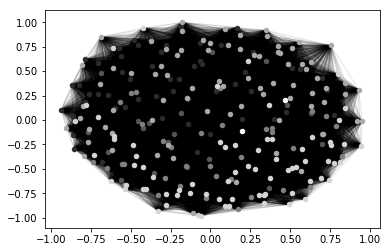

In [118]:
#drawing
size = float(len(set(earlyPART.values())))
print(size)
pos = nx.spring_layout(earlyH)
count = 0.
for com in set(earlyPART.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in earlyPART.keys()
                                if earlyPART[nodes] == com]
    nx.draw_networkx_nodes(earlyH, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(earlyH, pos, alpha=0.1)
plt.show()

In [99]:
for key, value in midPART.items():
    midH.node(data=True)[key].update({'color':value})

In [100]:
midH.nodes(data=True)

NodeDataView({0: {'X': -7, 'Y': -52, 'Z': 61, 'ID': 'Precuneus', 'color': 0}, 1: {'X': -14, 'Y': -18, 'Z': 40, 'ID': 'Cingulate Gyrus', 'color': 0}, 2: {'X': 0, 'Y': -15, 'Z': 47, 'ID': 'Paracentral Lobule', 'color': 0}, 3: {'X': 10, 'Y': -2, 'Z': 45, 'ID': 'Cingulate Gyrus', 'color': 0}, 4: {'X': -7, 'Y': -21, 'Z': 65, 'ID': 'Medial Frontal Gyrus', 'color': 0}, 5: {'X': -7, 'Y': -33, 'Z': 72, 'ID': 'Postcentral Gyrus', 'color': 0}, 6: {'X': 13, 'Y': -33, 'Z': 75, 'ID': 'Postcentral Gyrus', 'color': 0}, 7: {'X': -54, 'Y': -23, 'Z': 43, 'ID': 'Postcentral Gyrus', 'color': 0}, 8: {'X': 29, 'Y': -17, 'Z': 71, 'ID': 'Precentral Gyrus', 'color': 0}, 9: {'X': 10, 'Y': -46, 'Z': 73, 'ID': 'Postcentral Gyrus', 'color': 0}, 10: {'X': -23, 'Y': -30, 'Z': 72, 'ID': 'Postcentral Gyrus', 'color': 0}, 11: {'X': -40, 'Y': -19, 'Z': 54, 'ID': 'Postcentral Gyrus', 'color': 0}, 12: {'X': 29, 'Y': -39, 'Z': 59, 'ID': 'Postcentral Gyrus', 'color': 0}, 13: {'X': 50, 'Y': -20, 'Z': 42, 'ID': 'Postcentral Gy

In [101]:
for key, value in latePART.items():
    lateH.node(data=True)[key].update({'color':value})

In [93]:
# list(H.edges(data=True))[0]
# H.edges(data=True)
early_edge_weights = [e[2]['weight'] for e in earlyH.edges(data=True)]
mid_edge_weights = [e[2]['weight'] for e in midH.edges(data=True)]
late_edge_weights = [e[2]['weight'] for e in lateH.edges(data=True)]


In [119]:
# Define node positions data structure (dict) for plotting
early_node_colors = {node[0]: (node[1]['color']) for node in earlyH.nodes(data=True)}
mid_node_colors = {node[0]: (node[1]['color']) for node in midH.nodes(data=True)}
late_node_colors = {node[0]: (node[1]['color']) for node in lateH.nodes(data=True)}

# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries).
#dict(list(node_colors.items())[0:5])
#print(G.node(data=True))
early_list_colors=list(early_node_colors.values())
mid_list_colors=list(mid_node_colors.values())
late_list_colors=list(late_node_colors.values())

In [120]:
early_node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in earlyH.nodes(data=True)}
mid_node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in midH.nodes(data=True)}
late_node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in lateH.nodes(data=True)}

In [ ]:
# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in H.nodes(data=True)}
node_colors = {node[0]: (node[1]['color']) for node in H.nodes(data=True)}

# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries).
#dict(list(node_colors.items())[0:5])
#print(G.node(data=True))
list_colors=list(node_colors.values())

### Visualize differences

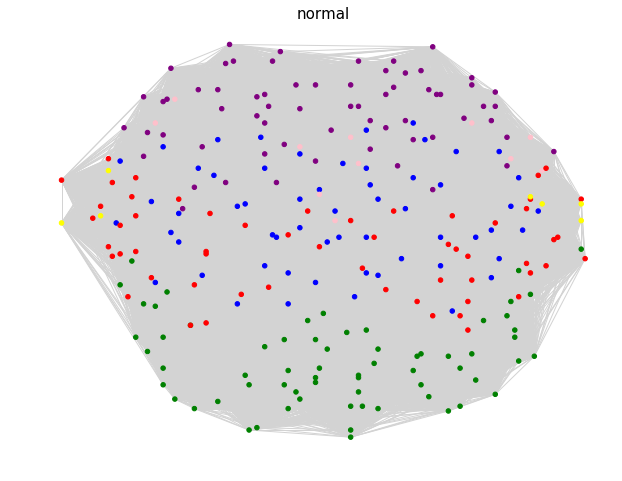

In [106]:
plt.figure(figsize=(8, 6))
nx.draw(noH, pos=no_node_positions,  node_size=20,  edge_color = "lightgrey", node_color = no_list_colors)
plt.title('normal', size=15)
plt.show()

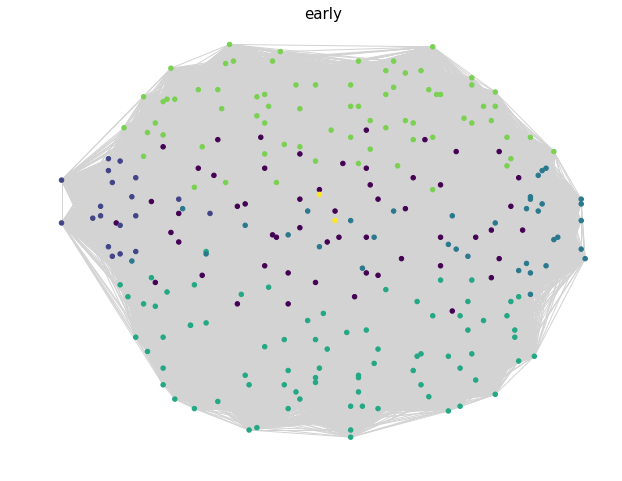

In [107]:
plt.figure(figsize=(8, 6))
nx.draw(earlyH, pos=early_node_positions,  node_size=20,  edge_color = "lightgrey", node_color = early_list_colors)
plt.title('early', size=15)
plt.show()

In [121]:
early_list_colors

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 3,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 4,
 3,
 3,
 4,
 3,
 4,
 4,
 3,
 3,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 1,
 1,
 2,
 1,
 3,
 3,
 2,
 4,
 4,
 4,
 4,
 2,
 3,
 4,
 1,
 3,
 3,
 5,
 4,
 4,
 0,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 3,
 3,
 1,
 0,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 4,
 0,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 0,
 2,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 0,
 4,
 4,
 4,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 3,


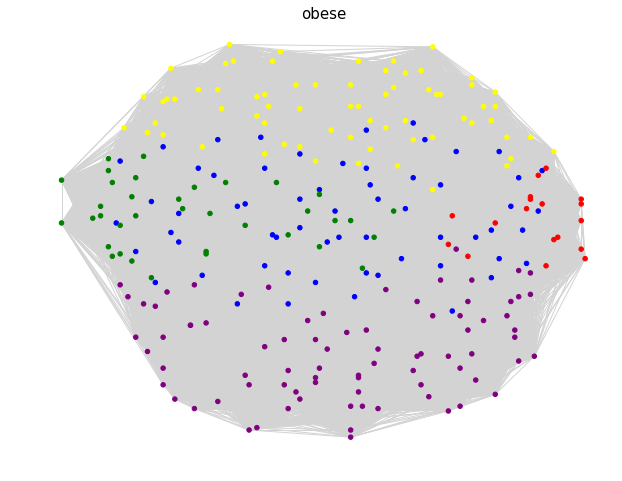

In [108]:
plt.figure(figsize=(8, 6))
nx.draw(obH, pos=ob_node_positions,  node_size=20,  edge_color = "lightgrey", node_color = ob_list_colors)
plt.title('obese', size=15)
plt.show()

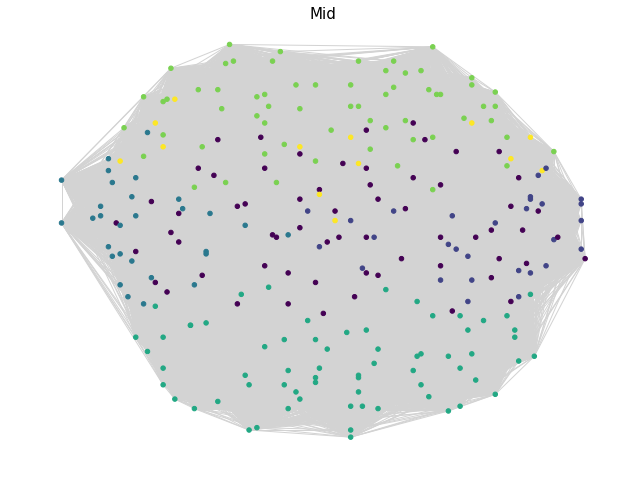

In [109]:
plt.figure(figsize=(8, 6))
nx.draw(midH, pos=mid_node_positions,  node_size=20,  edge_color = "lightgrey", node_color = mid_list_colors)
plt.title('Mid', size=15)
plt.show()

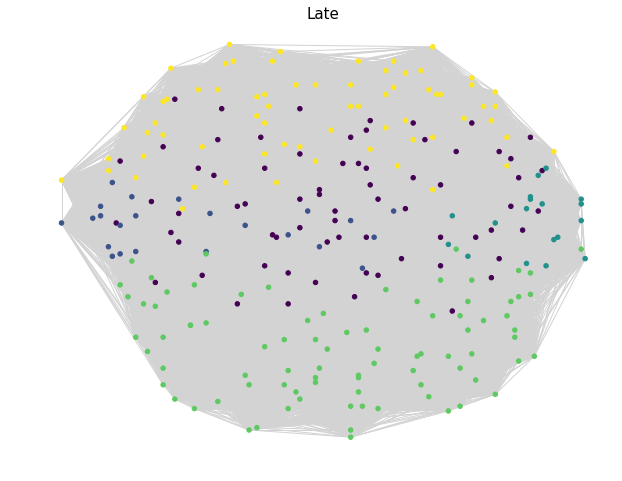

In [110]:
plt.figure(figsize=(8, 6))
nx.draw(lateH, pos=late_node_positions,  node_size=20,  edge_color = "lightgrey", node_color = late_list_colors)
plt.title('Late', size=15)
plt.show()

In [ ]:
nog=community.induced_graph(noPART,noH)
create_corr_network_1(G=nog)

In [ ]:
ovg=community.induced_graph(ovPART,ovH)
create_corr_network_1(G=ovg)

In [ ]:
obg=community.induced_graph(obPART,obH)
create_corr_network_1(G=obg)

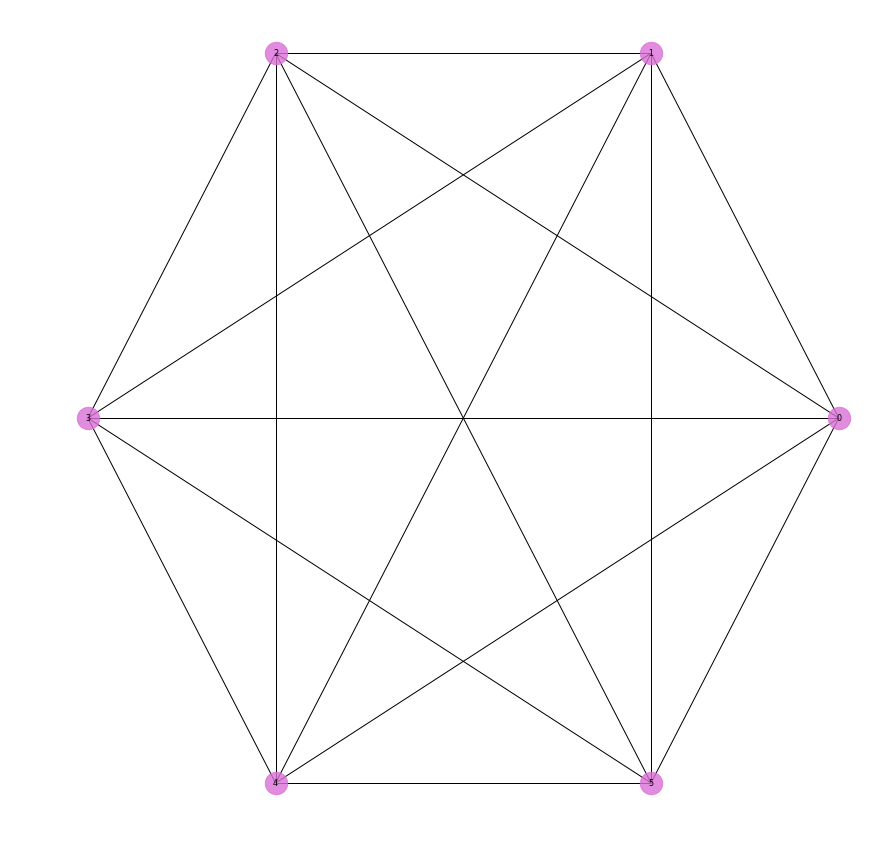

In [111]:
earlyg=community.induced_graph(earlyPART,earlyH)
create_corr_network_1(G=earlyg)

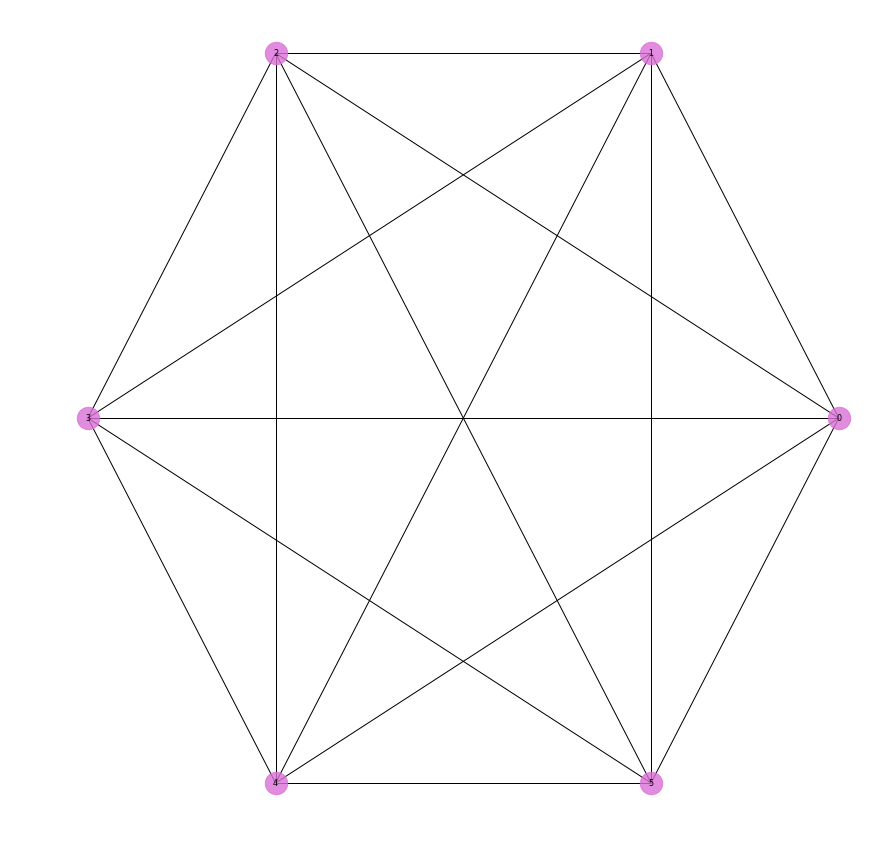

In [112]:
midg=community.induced_graph(midPART,midH)
create_corr_network_1(G=midg)

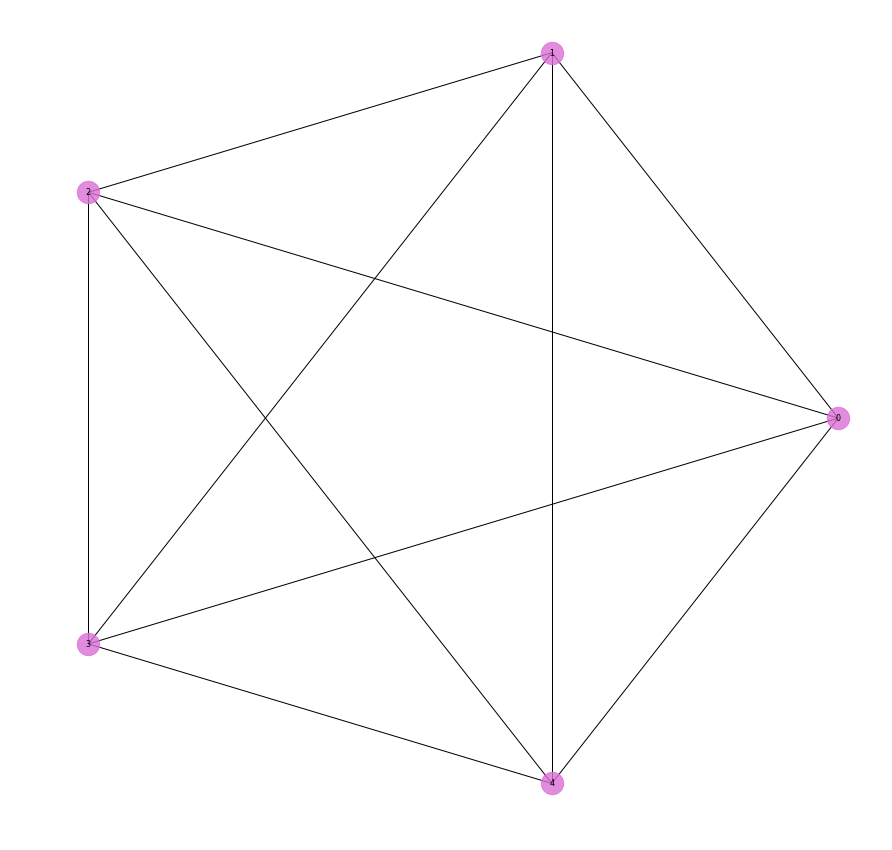

In [113]:
lateg=community.induced_graph(latePART,lateH)
create_corr_network_1(G=lateg)

### Summmary of results so far... 
Looks like the obese have one less module compared to the overweight and the normal weight 
Need to assess what each node is comprised of  


In [3]:
# Download data
arch = np.load(download_file('phase_sync_delta.npz', astype='example_data'))
nodes, edges = arch['nodes'], arch['edges']
# Create the scene with a black background
sc = SceneObj(size=(1500, 600))

NameError: name 'np' is not defined

In [1]:
nodes

NameError: name 'nodes' is not defined

In [124]:
# Coloring method
color_by = 'strength'
# Because we don't want to plot every connections, we only keep connections
# above .7
select = edges > .7
# Define the connectivity object
c_default = ConnectObj('default', nodes, edges, select=select, line_width=2.,
                       cmap='Spectral_r', color_by=color_by)
# Then, we define the sources
s_obj = SourceObj('sources', nodes, color='#ab4642', radius_min=15.)
sc.add_to_subplot(c_default, title='Color by connectivity strength')
# And add connect, source and brain objects to the scene
sc.add_to_subplot(s_obj)
sc.add_to_subplot(BrainObj('B3'), use_this_cam=True)

ConnectObj(name='default') created
    104 nodes detected
    strength coloring method for connectivity
    174 connectivity links displayed
SourceObj(name='sources') created
    104 sources detected
    ConnectObj(name='default') added to the scene
    SourceObj(name='sources') added to the scene
BrainObj(name='B3') created
visbrain_data has been added to /Users/gracer/visbrain_data/templates
STATUS : 100.0% 2441216 / 2435835
    BrainObj(name='B3') added to the scene


In [125]:
# Coloring method
color_by = 'count'
# Weak connections -> alpha = .1 // strong connections -> alpha = 1.
dynamic = (.1, 1.)
# Define the connectivity and source object
c_count = ConnectObj('default', nodes, edges, select=select, line_width=4.,
                     color_by=color_by, antialias=True, dynamic=dynamic)
s_obj_c = SourceObj('sources', nodes, color='olive', radius_min=10.,
                    symbol='square')
# And add connect, source and brain objects to the scene
sc.add_to_subplot(c_count, row=0, col=1,
                  title='Color by number of connections per node')
sc.add_to_subplot(s_obj_c, use_this_cam=True, row=0, col=1)
sc.add_to_subplot(BrainObj('B3'), use_this_cam=True, row=0, col=1)

ConnectObj(name='default') created
    104 nodes detected
    count coloring method for connectivity
    174 connectivity links displayed
SourceObj(name='sources') created
    104 sources detected
    ConnectObj(name='default') added to the scene
    SourceObj(name='sources') added to the scene
BrainObj(name='B3') created
    BrainObj(name='B3') added to the scene


In [135]:
# First, we take a copy of the connectivity array
edges_copy = edges.copy()
# Then, we force edges to take fixed values
# ====================   =========  ===========
# Condition              New value  Color
# ====================   =========  ===========
# edges >= 0.8              4.      red
# edges in [.78, .8[        3.      orange
# edges in [.74, .78[       2.      blue
# Others                    -       lightgray
# ====================   =========  ===========
edges_copy[edges_copy >= .8] = 4.
edges_copy[np.logical_and(edges_copy >= .78, edges_copy < .8)] = 3.
edges_copy[np.logical_and(edges_copy >= .74, edges_copy < .78)] = 2.
# Now we use a dctionary to set one color per value.
ccol = {
    None: 'lightgray',
    2.: 'blue',
    3.: 'orange',
    4.: 'red'
}

# Define the connectivity and source objects
c_cuscol = ConnectObj('default', nodes, edges_copy, select=edges > .7,
                      custom_colors=ccol)
s_obj_cu = SourceObj('sources', nodes, color='slategray', radius_min=10.,
                     symbol='ring')
# Add objects to the scene
sc.add_to_subplot(c_cuscol, row=0, col=2, title='Custom colors')
sc.add_to_subplot(s_obj_cu, row=0, col=2)
sc.add_to_subplot(BrainObj('white'), use_this_cam=True, row=0, col=2)

# Finally, display the scene
sc.preview()
sc.screenshot('/Users/gracer/Google Drive/ABCD/tmp/figlayout.png', dpi=600)

ConnectObj(name='default') created
    104 nodes detected
    strength coloring method for connectivity
    174 connectivity links displayed
SourceObj(name='sources') created
    104 sources detected
ERROR | A title is already set. 'Custom colors' ignored
    ConnectObj(name='default') added to the scene
    SourceObj(name='sources') added to the scene
BrainObj(name='white') created
    BrainObj(name='white') added to the scene


[........................................] 100.00000 \ downloading   File saved as /Users/gracer/Library/Application Support/vispy/data/fonts/OpenSans-Bold.ttf.



WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`
Image of size (6000, 2400)px successfully saved (/Users/gracer/Google Drive/ABCD/tmp/figlayout.png)


## Saving the data

In [ ]:
no_ROIs = list(noPART.keys())
no_MODS = list(noPART.values())

ov_ROIs = list(ovPART.keys())
ov_MODS = list(ovPART.values())

ob_ROIs = list(obPART.keys())
ob_MODS = list(obPART.values())


In [ ]:
nodf = pd.DataFrame(no_MODS)
nodf['ROI'] = no_ROIs
# nodf.to_csv("/Users/gracer/Google Drive/ABCD/tmp/normal_Module.csv", sep=',', index=False)

In [ ]:
ovdf = pd.DataFrame(ov_MODS)
ovdf['ROI'] = ov_ROIs
# ovdf.to_csv("/Users/gracer/Google Drive/ABCD/tmp/overweight_Module.csv", sep=',', index=False)

In [ ]:
obdf = pd.DataFrame(ob_MODS)
obdf['ROI'] = ob_ROIs
# obdf.to_csv("/Users/gracer/Google Drive/ABCD/tmp/obese_Module.csv", sep=',', index=False)

In [114]:
early_ROIs = list(earlyPART.keys())
early_MODS = list(earlyPART.values())

mid_ROIs = list(midPART.keys())
mid_MODS = list(midPART.values())

late_ROIs = list(latePART.keys())
late_MODS = list(latePART.values())


In [115]:
earlydf = pd.DataFrame(early_MODS)
earlydf['ROI'] = early_ROIs
earlydf.to_csv("/Users/gracer/Google Drive/ABCD/tmp/early_Module.csv", sep=',', index=False)

In [116]:
middf = pd.DataFrame(mid_MODS)
middf['ROI'] = mid_ROIs
middf.to_csv("/Users/gracer/Google Drive/ABCD/tmp/mid_Module.csv", sep=',', index=False)

In [117]:
latedf = pd.DataFrame(late_MODS)
latedf['ROI'] = late_ROIs
latedf.to_csv("/Users/gracer/Google Drive/ABCD/tmp/late_Module.csv", sep=',', index=False)

## Parcelation 
Through BIAC https://wiki.biac.duke.edu/biac:analysis:resting_pipeline

## Individual and Group Matrices
Network-level analysis will be performed with inividual correltion matrices

## Thresholding
In accordance with van den Heuvel et al. 2017, we will examine and test statistical differences in functional connectivity (FC) defined as the mean of the correlation matrix. FC will be included in statistical tests between groups.

## Partitioning
Will partition full 264 connectome into modules using louvain algorithm. 

## Check the partition
Will use normalized mutual information to assess similarity between network assignments. NMI measures information shared between two probability distribution functions, specifically measuring how much knowing one distribution leads to certainty ofthe other. Permuted the labels of individual matrices between contrasts 1,000 times to generate a null distribution of NMI values for each contrast. Matrices between groups were randomly shuffled and partitioned into functional networks, and NMI was calculated.   
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html#sklearn.metrics.normalized_mutual_info_score

## Connectivity Strength
Caluclate Euclidean distance for each ROI-ROI pair. Linear regression with distance as a predictor of connectivity strength between groups.

### Within network changes
All within network pairwise relationships were averaged per group. Two-tailed T-test to assess differences. Bonferroni corrections as needed.

### Between network changes
Average connectivity is calculated per network. Compare the between network interactions. 

## Participation Coefficient
Partition networks into the modules, calculate the PC per node within each group. Higher PC indicates more distributed between network connectivity, while a PC of 0 signifies a node’s links are completely within its home network (within network).

## Pickling data to save it

In [ ]:
# sfile = bz2.BZ2File('/Users/gracer/Google Drive/ABCD/tmp/smallerfile', 'w')
# pickle.dump(GRAPHS, sfile)
GRAPHS['BIGdf'] = BIGdf
GRAPHS['maxes'] = maxes
pickle.dump(saveme, open('/Users/gracer/Google Drive/ABCD/tmp/just_mean', 'wb'), protocol=4)